In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [2]:
train = pd.read_csv('Training_cleaned_merge3oct.csv')
target = '47'
IDcol = 'application_key'
# train.head()

In [3]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

C:\Users\BaadRoR\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\BaadRoR\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
# gbm0 = GradientBoostingClassifier(random_state=10)
# modelfit(gbm0, train, predictors)

# n_estimators 80

In [6]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {"n_estimators":[80,90,100,110,120,130,140,150,160,170]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [7]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.83525, std: 0.00705, params: {'n_estimators': 80},
  mean: 0.83505, std: 0.00697, params: {'n_estimators': 90},
  mean: 0.83476, std: 0.00679, params: {'n_estimators': 100},
  mean: 0.83427, std: 0.00690, params: {'n_estimators': 110},
  mean: 0.83385, std: 0.00685, params: {'n_estimators': 120},
  mean: 0.83338, std: 0.00691, params: {'n_estimators': 130},
  mean: 0.83298, std: 0.00681, params: {'n_estimators': 140},
  mean: 0.83255, std: 0.00686, params: {'n_estimators': 150},
  mean: 0.83236, std: 0.00712, params: {'n_estimators': 160},
  mean: 0.83217, std: 0.00707, params: {'n_estimators': 170}],
 {'n_estimators': 80},
 0.8352548731869872)

# max _depth 5

In [5]:
param_test2 = {'max_depth':[5,7,9,11,13,15,17,19], 'min_samples_split':[600,800,1000,1200,1400,1600]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.83679, std: 0.00660, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.83743, std: 0.00683, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.83663, std: 0.00664, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.83711, std: 0.00676, params: {'max_depth': 5, 'min_samples_split': 1200},
  mean: 0.83677, std: 0.00734, params: {'max_depth': 5, 'min_samples_split': 1400},
  mean: 0.83682, std: 0.00698, params: {'max_depth': 5, 'min_samples_split': 1600},
  mean: 0.83537, std: 0.00713, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.83564, std: 0.00762, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.83615, std: 0.00697, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.83610, std: 0.00664, params: {'max_depth': 7, 'min_samples_split': 1200},
  mean: 0.83682, std: 0.00675, params: {'max_depth': 7, 'min_samples_split': 1400},
  mean: 0.83642, std: 0.00694, params: {'max_depth': 7, 'min_samples_split': 160

# min_samples_leaf': 70, 'min_samples_split': 1200

In [9]:
param_test3 = {'min_samples_split':[1000,1200,1400,1600,1800,2000,2200,2400], 'min_samples_leaf':[30,40,50,60,70,80]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83739, std: 0.00699, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.83713, std: 0.00723, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.83728, std: 0.00717, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.83737, std: 0.00713, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.83702, std: 0.00714, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.83705, std: 0.00734, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.83693, std: 0.00727, params: {'min_samples_leaf': 30, 'min_samples_split': 2200},
  mean: 0.83679, std: 0.00709, params: {'min_samples_leaf': 30, 'min_samples_split': 2400},
  mean: 0.83759, std: 0.00705, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.83725, std: 0.00715, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.83728, std: 0.00724, params: {'min_samples_leaf': 40, 'min_samples_spl

# max_features': 13

In [10]:
param_test4 = {'max_features':[7,9,11,13,15,17,19,21,23,25]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=80,max_depth=5, min_samples_split=1200, min_samples_leaf=70, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83685, std: 0.00768, params: {'max_features': 7},
  mean: 0.83726, std: 0.00742, params: {'max_features': 9},
  mean: 0.83736, std: 0.00726, params: {'max_features': 11},
  mean: 0.83781, std: 0.00707, params: {'max_features': 13},
  mean: 0.83742, std: 0.00721, params: {'max_features': 15},
  mean: 0.83766, std: 0.00701, params: {'max_features': 17},
  mean: 0.83699, std: 0.00748, params: {'max_features': 19},
  mean: 0.83731, std: 0.00742, params: {'max_features': 21},
  mean: 0.83720, std: 0.00745, params: {'max_features': 23},
  mean: 0.83738, std: 0.00770, params: {'max_features': 25}],
 {'max_features': 13},
 0.83780867712534)

# subsample 0.6

In [15]:
param_test5 = {'subsample':[0.5,0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.15, n_estimators=80,max_depth=5,min_samples_split=1200, min_samples_leaf=70, subsample=0.8, random_state=10,max_features=13),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.83739, std: 0.00689, params: {'subsample': 0.5},
  mean: 0.83808, std: 0.00704, params: {'subsample': 0.6},
  mean: 0.83794, std: 0.00717, params: {'subsample': 0.7},
  mean: 0.83804, std: 0.00719, params: {'subsample': 0.75},
  mean: 0.83784, std: 0.00715, params: {'subsample': 0.8},
  mean: 0.83753, std: 0.00704, params: {'subsample': 0.85},
  mean: 0.83754, std: 0.00699, params: {'subsample': 0.9}],
 {'subsample': 0.6},
 0.8380770229844359)

# n =160 and leaning rate 0.5


Model Report
Accuracy : 0.8222
AUC Score (Train): 0.858301
CV Score : Mean - 0.8396866 | Std - 0.006979153 | Min - 0.8288995 | Max - 0.8487185


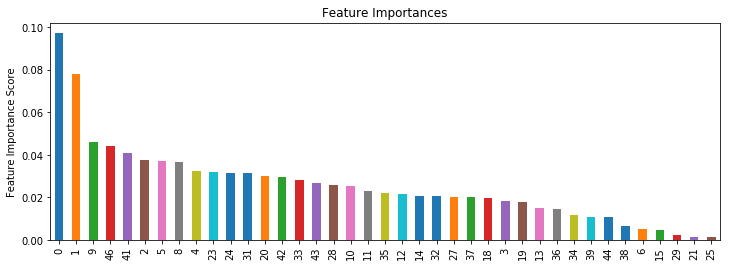

In [18]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=180,max_depth=7, min_samples_split=1200,min_samples_leaf=80, subsample=0.75, random_state=10, max_features=7)
modelfit(gbm_tuned_1, train, predictors)

# n= 600 learning rate .01


Model Report
Accuracy : 0.8201
AUC Score (Train): 0.854373
CV Score : Mean - 0.8390529 | Std - 0.007205904 | Min - 0.8280033 | Max - 0.8486826


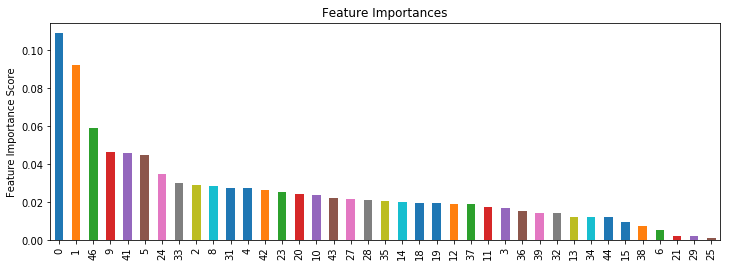

In [19]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=7, min_samples_split=1200,min_samples_leaf=80, subsample=0.75, random_state=10, max_features=7)
modelfit(gbm_tuned_2, train, predictors)

# n=2000 learning rate =.005

In [21]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=2000,max_depth=7, min_samples_split=1200,min_samples_leaf=80, subsample=0.75, random_state=10, max_features=7)
gbm_tuned_3.fit(train[predictors],train[target])
gbm_tuned_3.score(train[predictors],train[target])

0.8245625


Model Report
Accuracy : 0.8246
AUC Score (Train): 0.860691
CV Score : Mean - 0.8403162 | Std - 0.007055575 | Min - 0.8293019 | Max - 0.8492015


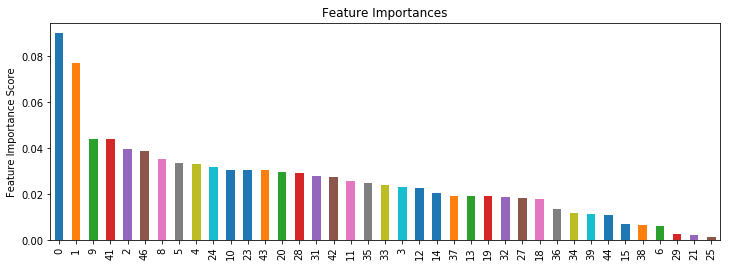

In [27]:
modelfit(gbm_tuned_3, train, predictors)

In [23]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_4= GradientBoostingClassifier(learning_rate=0.005, n_estimators=1000,max_depth=5, min_samples_split=1200,min_samples_leaf=70, subsample=0.6, random_state=10, max_features=13)
gbm_tuned_4.fit(train[predictors],train[target])
gbm_tuned_4.score(train[predictors],train[target])

0.8136375

# n=1000 and learning rate .005

In [24]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_5= GradientBoostingClassifier(learning_rate=0.005, n_estimators=1000,max_depth=5, min_samples_split=1200,min_samples_leaf=70, subsample=0.6, random_state=10, max_features=13)
gbm_tuned_5.fit(train[predictors],train[target])
gbm_tuned_5.score(train[predictors],train[target])

0.8136375

In [ ]:
n=1500 and learning rate .001

In [26]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_6= GradientBoostingClassifier(learning_rate=0.001, n_estimators=1500,max_depth=5, min_samples_split=1200,min_samples_leaf=70, subsample=0.6, random_state=10, max_features=13)
gbm_tuned_6.fit(train[predictors],train[target])
gbm_tuned_6.score(train[predictors],train[target])

0.7957375

In [25]:
lead_df=pd.read_csv('lead_3oct_merge.csv',index_col='application_key')
# lead_df.columns=colm[:-1]
# lead_df=(lead_df-lead_df.mean(axis=0))/lead_df.std(axis=0)
# lead_df=lead_df[imp_col[:-1]]
# lead_df=Pca(lead_df)
print(len(predictors),lead_df.shape, 'gbm ')


lead_pred=gbm_tuned_5.predict(lead_df)
proba=gbm_tuned_5.predict_proba(lead_df)
lead_df['pridicted']=lead_pred
lead_df['prob']=proba[:,0]
lead_df=lead_df.sort_values(by=['prob'],ascending=False)
result=lead_df['pridicted'].astype(int)
result.to_csv('Datadevils_IITGuwahati_204.csv')

39 (25000, 39) gbm 


In [ ]:
modelfit(gbm_tuned_3, train, predictors)